<a href="https://colab.research.google.com/github/Laura-Neff/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drivers_data = pd.read_csv('driver_dataset.csv', sep='\t')

drivers_data.head(10)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
5,3423313857,41.91,10.0
6,3423312432,58.64,20.0
7,3423311434,52.02,8.0
8,3423311328,31.25,34.0
9,3423312488,44.31,19.0


In [ ]:
drivers_data.shape

(4000, 3)

In [ ]:
drivers_data.drop('Driver_ID', axis=1, inplace=True)

drivers_data.sample(10)

,Distance_Feature,Speeding_Feature
3323,188.10,15.0
352,53.23,40.0
3083,51.20,9.0
1691,51.39,9.0
2811,62.24,10.0
738,39.19,8.0
1228,55.29,6.0
233,45.82,42.0
3654,187.55,5.0
2682,65.76,9.0


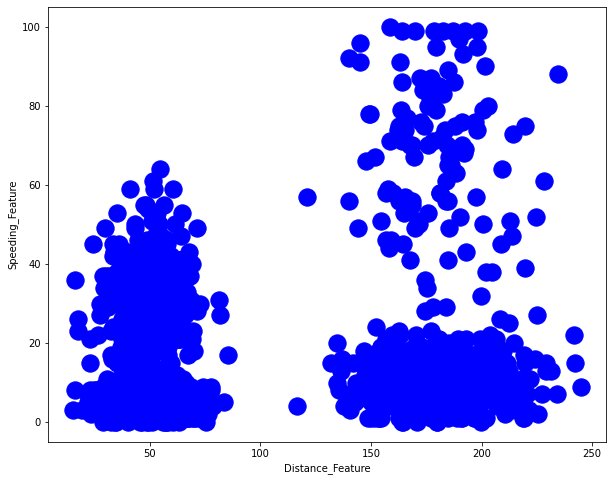

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(drivers_data['Distance_Feature'], 
            drivers_data['Speeding_Feature'], 
            s = 300, 
            c='blue')

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')

plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, max_iter=1000).fit(drivers_data)

#We are gonna cluster our data into 4 groups and do 1000 iterations of this

In [ ]:
kmeans_model.labels_[::40]
#shows us what cluster each piece of data was assigned to

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
np.unique(kmeans_model.labels_)
#shows us what clusters we have available 

array([0, 1, 2, 3], dtype=int32)

In [ ]:
zipped_list = list(zip(np.array(drivers_data), kmeans_model.labels_))

zipped_list[1000:1010]

#gives us piece of data and cluster it's assigned to; list of tuples
#distance, speed, and cluster

[(array([51.39,  4.  ]), 0),
 (array([53.95,  2.  ]), 0),
 (array([57.78,  7.  ]), 0),
 (array([45.77,  4.  ]), 0),
 (array([44.64,  6.  ]), 0),
 (array([42.6,  2. ]), 0),
 (array([63.59,  3.  ]), 0),
 (array([53.75,  6.  ]), 0),
 (array([55.88,  3.  ]), 0),
 (array([31.35,  7.  ]), 0)]

In [ ]:
centroids = kmeans_model.cluster_centers_

centroids

#find 4 center coordinates of data


array([[ 49.98428468,   5.21441441],
       [177.83509615,  70.28846154],
       [ 50.46127059,  32.42823529],
       [180.34311782,  10.52011494]])

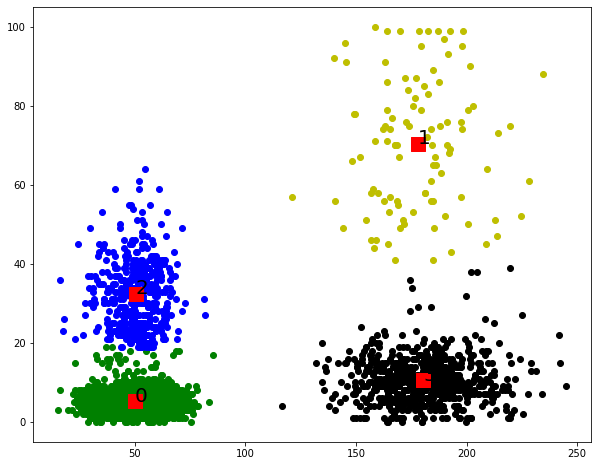

In [ ]:
colors = ['g', 'y', 'b', 'k']
    
plt.figure(figsize=(10, 8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1], 
                c=colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0], centroids[i][1]), fontsize=20)

#Make each cluster a different color; make every data point in each cluster have its corresponding color
#mark square marker of centroid for each cluster
#mark number of cluster

#cluster seems to have done well

In [ ]:
from sklearn.metrics import silhouette_score

print("Silhouette score: ", silhouette_score(drivers_data, kmeans_model.labels_))

#calculates how similar an object is compared to other objects in its own cluster (cohesion) and how different it is from other
#objects in other clusters (separation)

#If you decrease the amount of clusters, k, your silhouette score increases
#because you focus on finding drastic differences rather than subtle ones for clustering

Silhouette score:  0.5911323766293183
